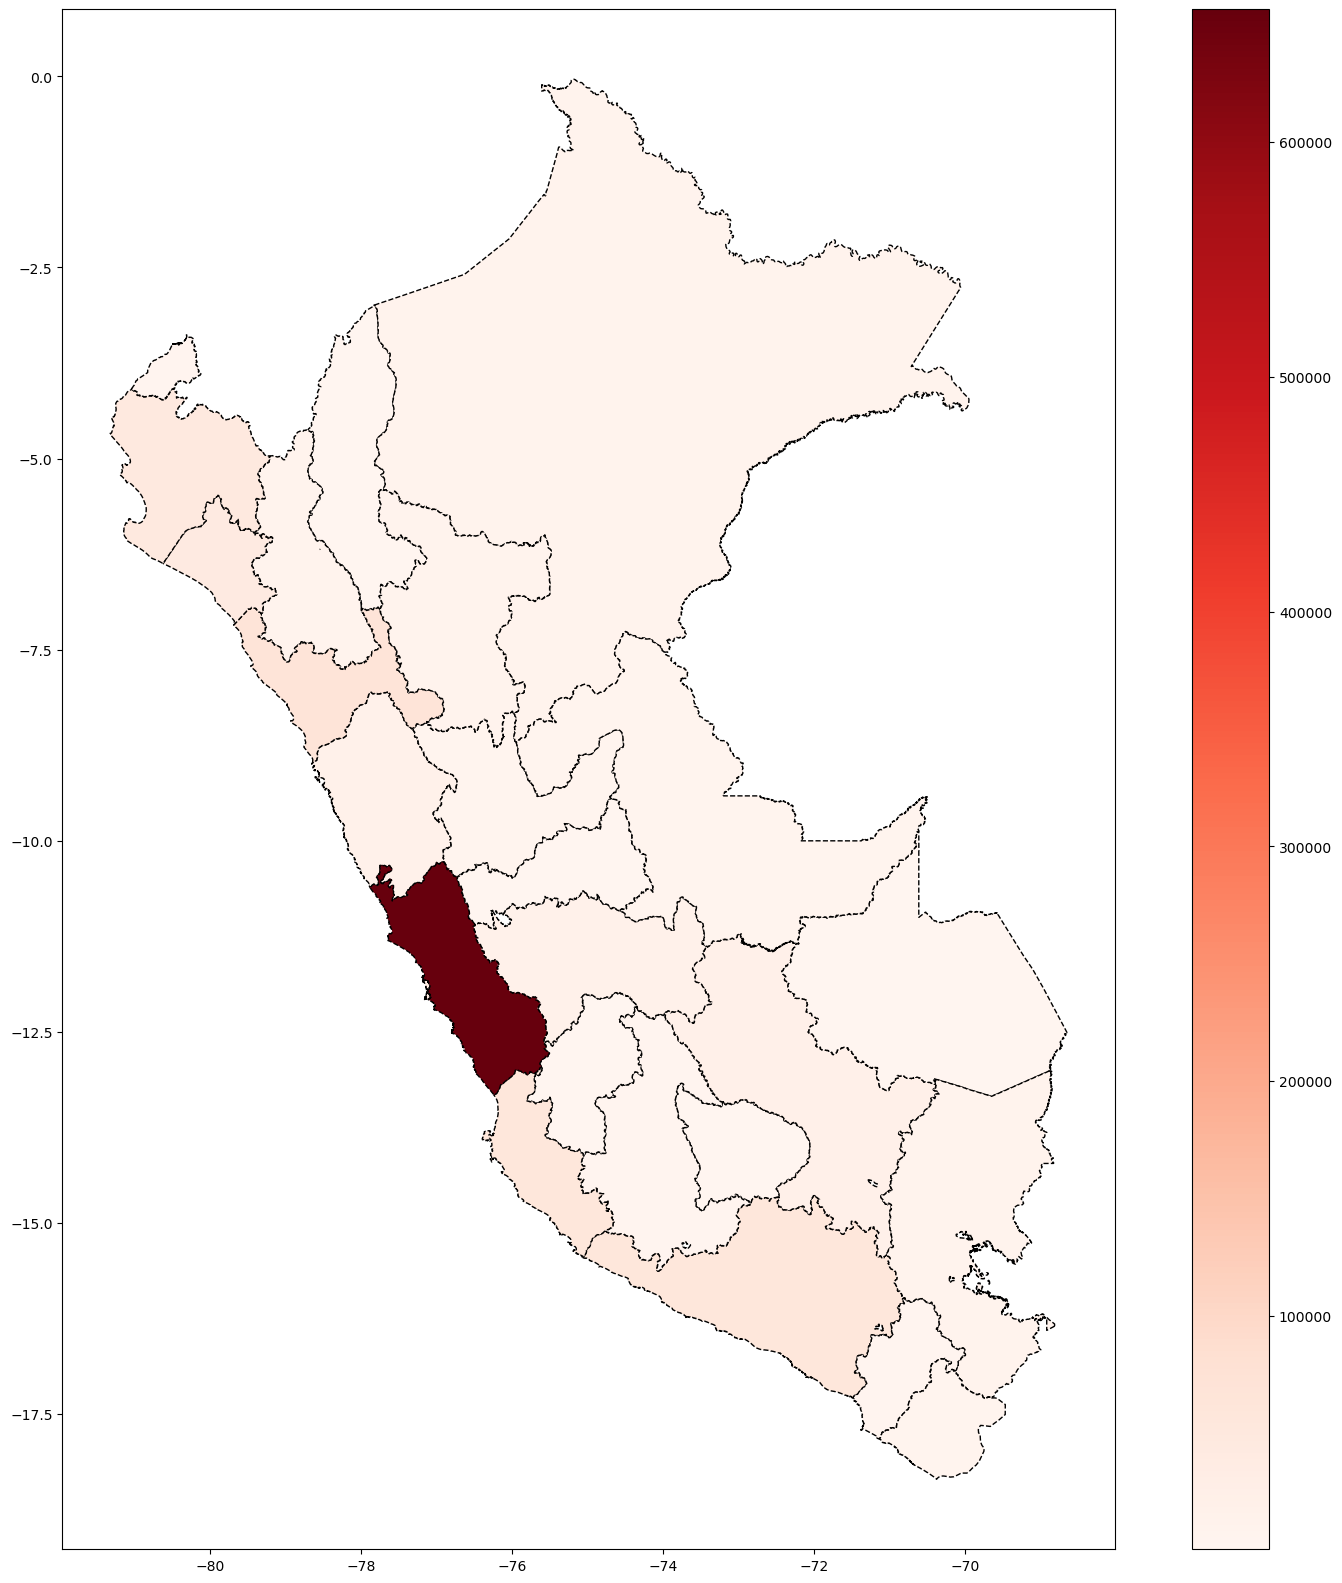

In [16]:
## MAP 1
from IPython.display import display, HTML

display(HTML(data="""
<style>
    div#notebook-container    { width: 95%; }
    div#menubar-container     { width: 65%; }
    div#maintoolbar-container { width: 99%; }a
</style>
"""))
import matplotlib.pyplot as plt 

import numpy as np
import pandas as pd
import geopandas as gpd

# Get data of labor
sex_work = pd.read_stata( r'C:\Users\Hp\Documents\GitHub\QLAB_Summer_Python\_data\8_trab_sex_20.dta')
sex_work[ 'dpt_code' ] = sex_work.cod_ubigeo.str[ :2 ].copy()
sex_work[ 'prov_code' ] = sex_work.cod_ubigeo.str[ :4 ].copy()

# Sex work
women_work = sex_work[ sex_work.sex == 'Mujer' ].copy().reset_index( drop = True )

# get data from lima
women_work[ 'month' ] = pd.to_datetime( women_work.month , format = '%B' ) \
                                    .dt.strftime( '%m' ) \
                                    .astype( int )

# Sort by department and month
women_work.sort_values([ 'dpt_code', 'month'], inplace = True )

# Get the total number of women workers by dpt
dpt_women_work = women_work.groupby( [ 'dpt_code', 'month'], as_index = False )[['empl']] \
                            .sum() \
                            .rename( columns = {'empl' :'women_empl'})

# Sort by dpt code and month
dpt_women_work.sort_values([ 'dpt_code', 'month'], inplace = True )

df2 = dpt_women_work.groupby( ['dpt_code'],as_index = False )[['women_empl']].mean()

#SHAPEFILE:
dpt_shp = gpd.read_file( r'C:\Users\Hp\Documents\GitHub\QLAB_Summer_Python\_data\INEI_LIMITE_DEPARTAMENTAL\INEI_LIMITE_DEPARTAMENTAL.shp' )
df3 = dpt_shp.merge( df2, left_on = 'CCDD', right_on = 'dpt_code'  )
df3.plot( column='women_empl', cmap='Reds', figsize=(20, 20), linestyle='--',
                      edgecolor='black', 
                      legend = True)


import folium
from folium import Choropleth

# Convert GeoDataFrame to GeoJSON
df3_geojson = df3[['dpt_code', 'women_empl', 'geometry']].to_json()

# Create a Map instance
m = folium.Map(location=[-9.1900, -75.0152], zoom_start=6)  # Coordinates for Peru

# Create a Choropleth layer and add it to the map
Choropleth(
    geo_data=df3_geojson,
    name='choropleth',
    data=df3,
    columns=['dpt_code', 'women_empl'],
    key_on='feature.properties.dpt_code',
    fill_color='Reds',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Number of Employers',
    
).add_to(m)

from folium import IFrame

# Create an IFrame to embed the map
iframe = IFrame("folium_map.html", width=900, height=600)

# Display the map in the notebook
display(folium.Map(location=[-9.1900, -75.0152], zoom_start=6).add_child(folium.Marker(location=[-9.1900, -75.0152], popup=folium.Popup(iframe))))

classification_kwds=dict(bins=[20000, 40000, 60000, 100000])

In [ ]:
# MAP 2
fig, ax = plt.subplots(figsize=(20, 20))
df3.plot( ax = ax, 
        column='women_empl', 
         cmap= 'Reds', 
         figsize=(20, 20), 
         linestyle='--',
         edgecolor='black', 
         legend = True,  
         scheme = "User_Defined", 
         classification_kwds = dict( bins = [ 20000, 40000, 60000, 100000  ] ), 
         legend_kwds = dict(  loc='upper left',
                            bbox_to_anchor=(1.01, 1),
                            fontsize='x-large',
                            title= "Number of Employers", 
                            title_fontsize = 'x-large', 
                            frameon= False )
        )

import folium
from folium import Choropleth
from folium.plugins import MarkerCluster

# Convert GeoDataFrame to GeoJSON
df3_geojson = df3[['dpt_code', 'women_empl', 'geometry']].to_json()

# Create a Map instance
m = folium.Map(location=[-9.1900, -75.0152], zoom_start=6)  # Coordinates for Peru

# Create a Choropleth layer and add it to the map
Choropleth(
    geo_data=df3_geojson,
    name='choropleth',
    data=df3,
    columns=['dpt_code', 'women_empl'],
    key_on='feature.properties.dpt_code',
    fill_color='Reds',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Number of Employers',
    bins=[20000, 40000, 60000, 100000]
).add_to(m)

# Create a MarkerCluster layer for additional information if needed
marker_cluster = MarkerCluster().add_to(m)

# Add markers or other information to the MarkerCluster layer
# For example, add a popup for each department with the number of employers
for idx, row in df3.iterrows():
    popup_text = f"Department: {row['dpt_code']}<br>Employers: {row['women_empl']}"
    folium.Marker([row['geometry'].centroid.y, row['geometry'].centroid.x], popup=popup_text).add_to(marker_cluster)

# Save the map to an HTML file
m.save("folium_map.html")

# Display the map in the notebook
m

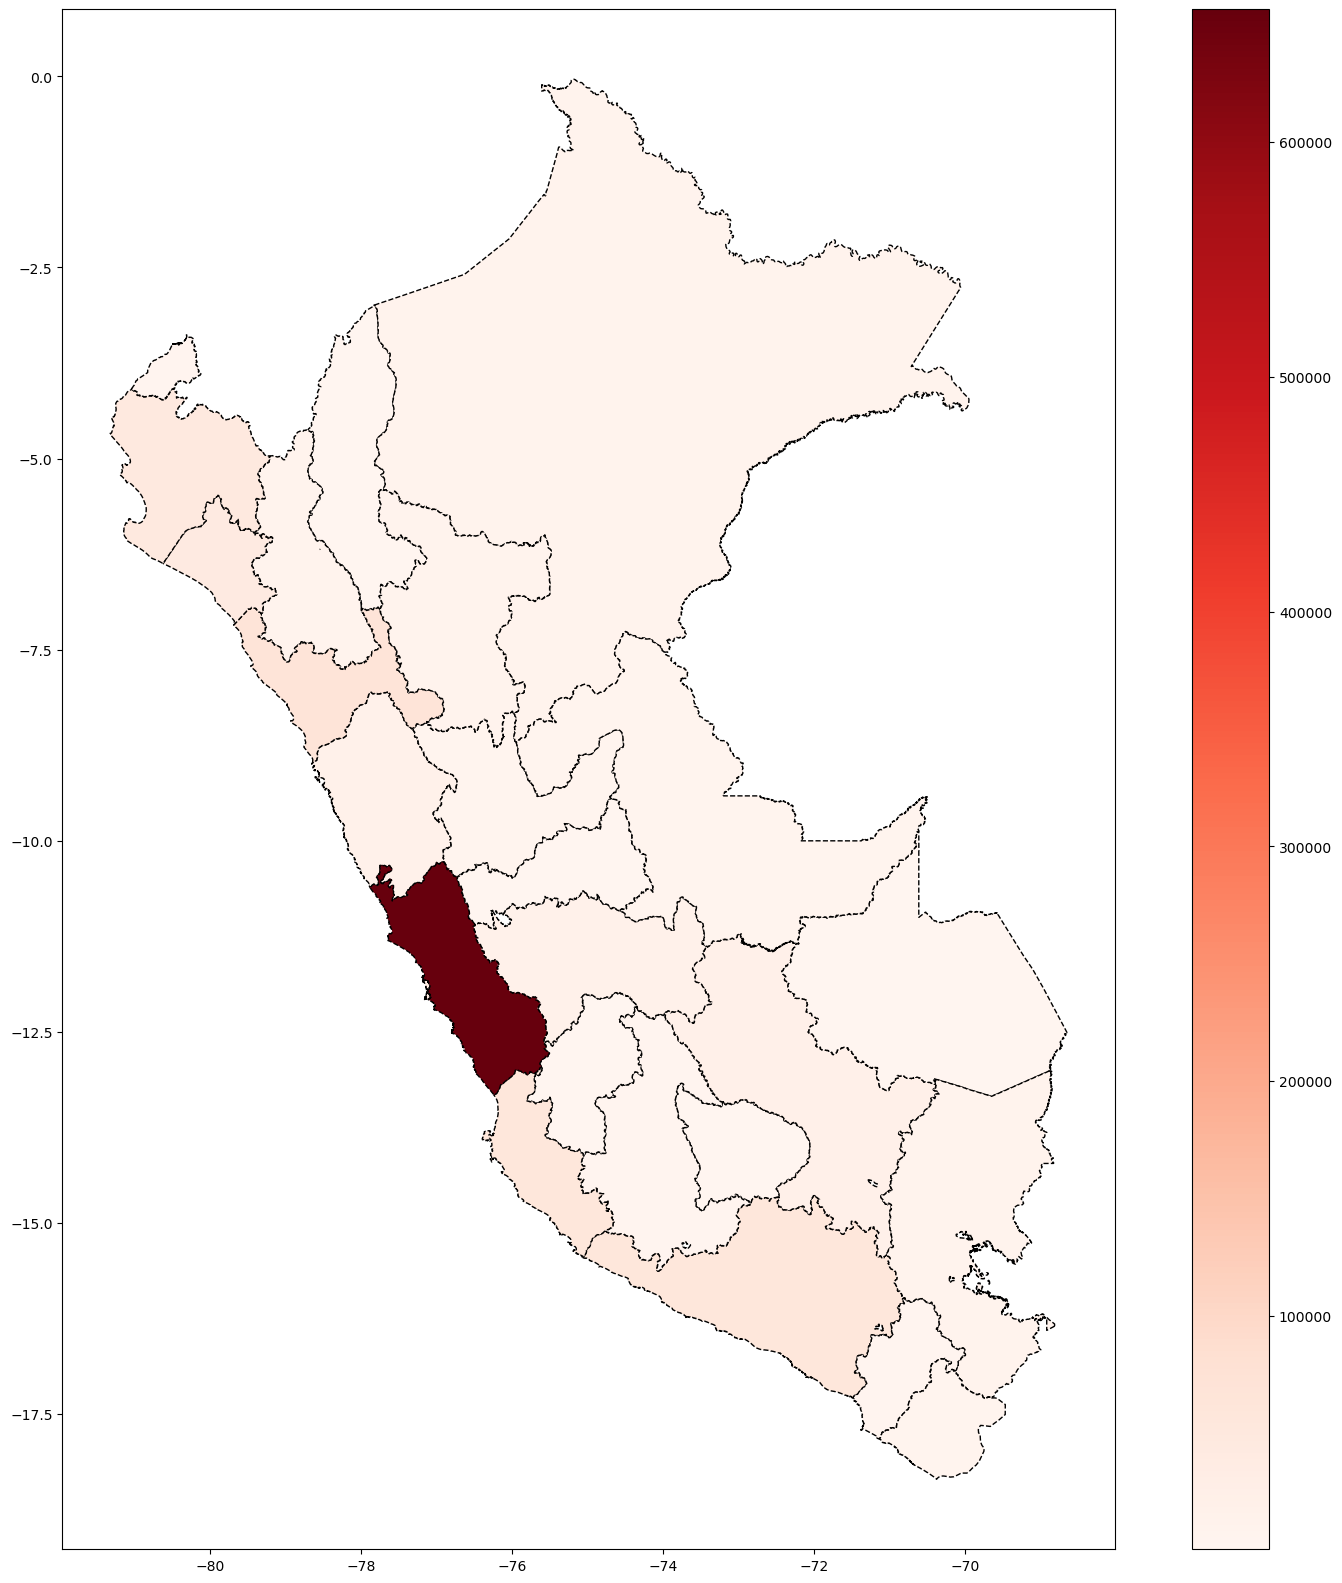

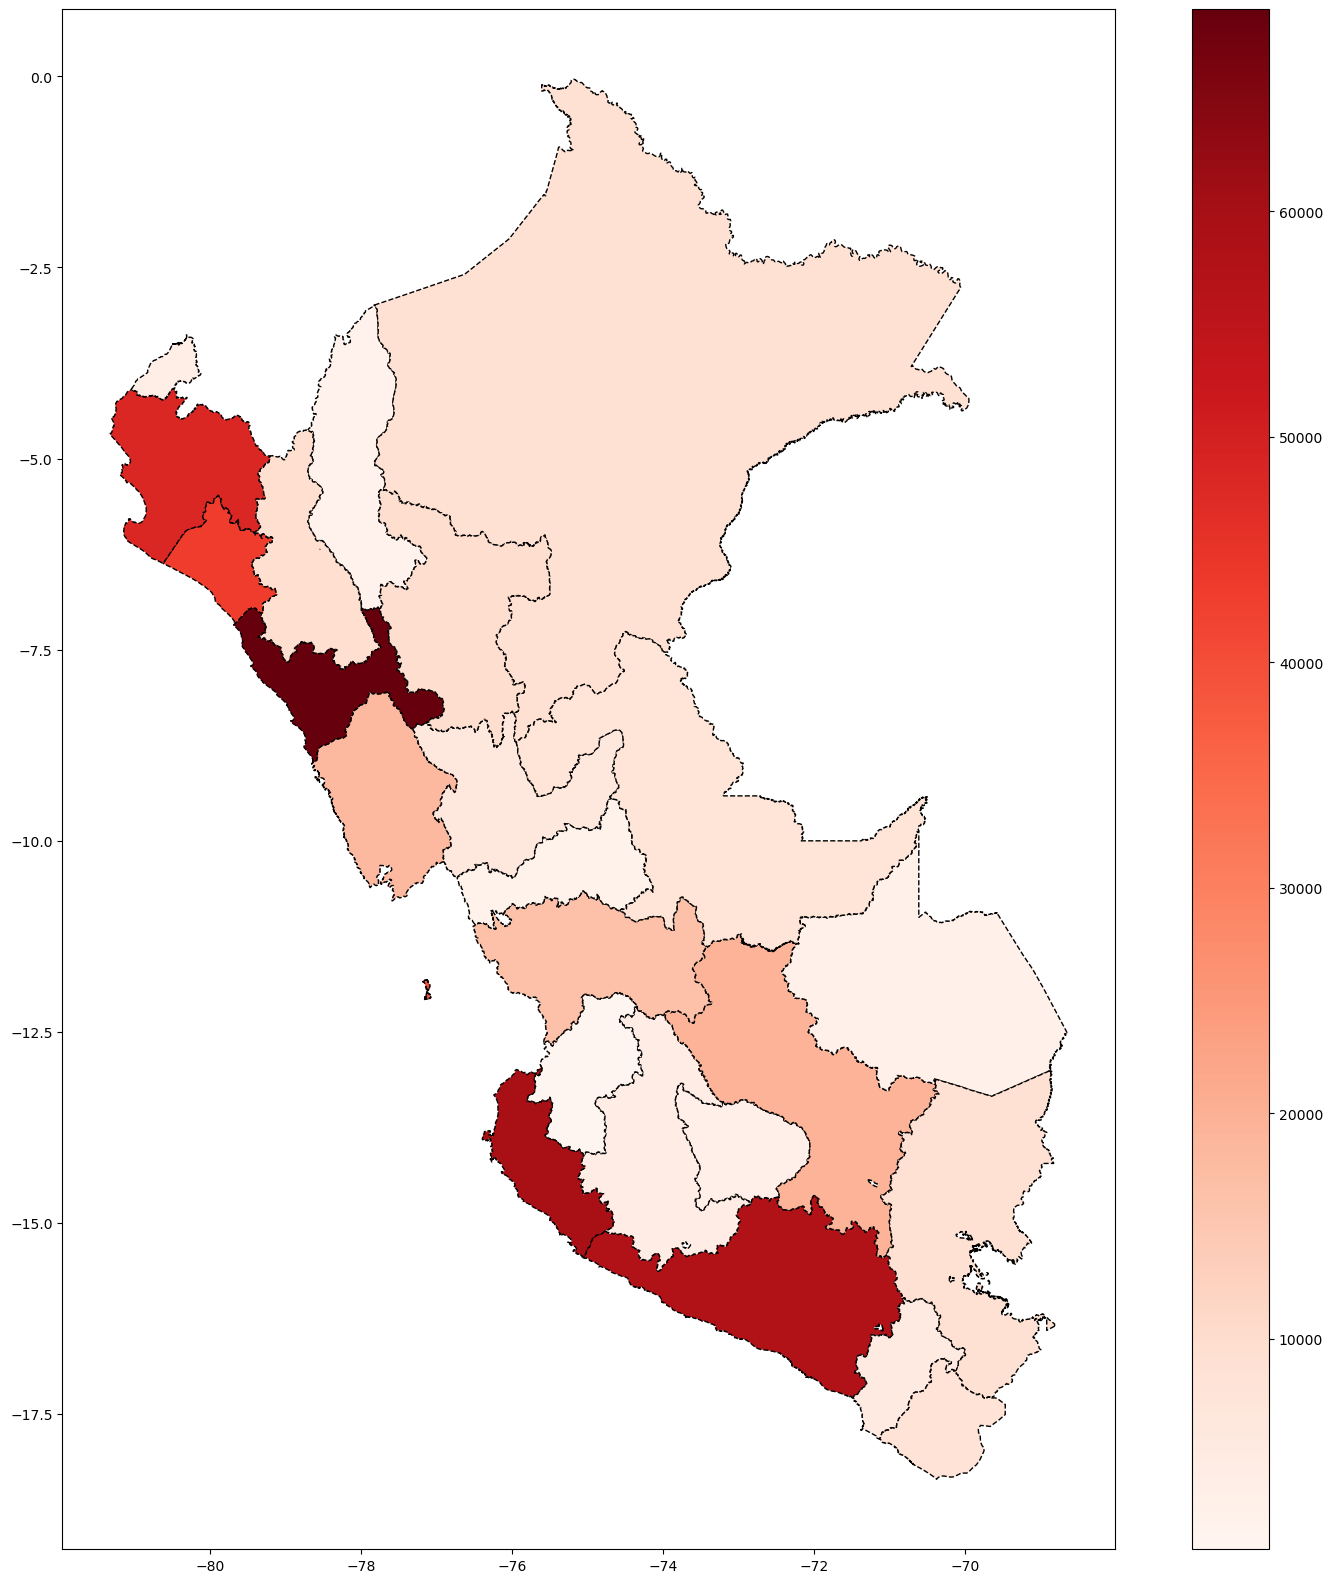

In [44]:
# MAP 3

from IPython.display import display, HTML

display(HTML(data="""
<style>
    div#notebook-container    { width: 95%; }
    div#menubar-container     { width: 65%; }
    div#maintoolbar-container { width: 99%; }a
</style>
"""))
import matplotlib.pyplot as plt 

import numpy as np
import pandas as pd
import geopandas as gpd

# Get data of labor
sex_work = pd.read_stata( r'C:\Users\Hp\Documents\GitHub\QLAB_Summer_Python\_data\8_trab_sex_20.dta')
sex_work[ 'dpt_code' ] = sex_work.cod_ubigeo.str[ :2 ].copy()
sex_work[ 'prov_code' ] = sex_work.cod_ubigeo.str[ :4 ].copy()

# Sex work
women_work = sex_work[ sex_work.sex == 'Mujer' ].copy().reset_index( drop = True )

# get data from lima
women_work[ 'month' ] = pd.to_datetime( women_work.month , format = '%B' ) \
                                    .dt.strftime( '%m' ) \
                                    .astype( int )

# Sort by department and month
women_work.sort_values([ 'dpt_code', 'month'], inplace = True )

# Get the total number of women workers by dpt
dpt_women_work = women_work.groupby( [ 'dpt_code', 'month'], as_index = False )[['empl']] \
                            .sum() \
                            .rename( columns = {'empl' :'women_empl'})

# Sort by dpt code and month
dpt_women_work.sort_values([ 'dpt_code', 'month'], inplace = True )

df2 = dpt_women_work.groupby( ['dpt_code'],as_index = False )[['women_empl']].mean()

#SHAPEFILE:
dpt_shp = gpd.read_file( r'C:\Users\Hp\Documents\GitHub\QLAB_Summer_Python\_data\INEI_LIMITE_DEPARTAMENTAL\INEI_LIMITE_DEPARTAMENTAL.shp' )
df3 = dpt_shp.merge( df2, left_on = 'CCDD', right_on = 'dpt_code'  )
df3.plot( column='women_empl', cmap='Reds', figsize=(20, 20), linestyle='--',
                      edgecolor='black', 
                      legend = True)
df3[ df3.CCDD != "15" ].plot( column='women_empl', cmap='Reds', figsize=(20, 20), linestyle='--',
                      edgecolor='black', 
                      legend = True)

import folium
from folium import Choropleth

# Convert GeoDataFrame to GeoJSON
df3_geojson = df3[['dpt_code', 'women_empl', 'geometry']].to_json()

# Create a Map instance
m = folium.Map(location=[-9.1900, -75.0152], zoom_start=6)  # Coordinates for Peru

# Create a Choropleth layer and add it to the map
Choropleth(
    geo_data=df3_geojson,
    name='choropleth',
    data=df3,
    columns=['dpt_code', 'women_empl'],
    key_on='feature.properties.dpt_code',
    fill_color='Reds',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Number of Employers',
).add_to(m)

# Save the map as an HTML file
m.save("folium_map.html")

print(m)

In [ ]:
#map 4
